*ref: https://inria.github.io/scikit-learn-mooc/python_scripts/01_tabular_data_exploration.html*

In [1]:
import pandas as pd

adult_census = pd.read_csv("../datasets/adult-census.csv",sep=',')

# The variables (columns) in the dataset
The data are stored in a pandas dataframe. A dataframe is a type of structured data composed of 2 dimensions. This type of data is also referred as tabular data.

Each row represents a “sample”. In the field of machine learning or descriptive statistics, commonly used equivalent terms are “record”, “instance”, or “observation”.

Each column represents a type of information that has been collected and is called a “feature”. In the field of machine learning and descriptive statistics, commonly used equivalent terms are “variable”, “attribute”, or “covariate”.

In [2]:
adult_census.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
target_column = "class"
adult_census[target_column].value_counts()

 <=50K    37155
 >50K     11687
Name: class, dtype: int64

Here, classes are slightly imbalanced, meaning there are more samples of one or more classes compared to others. In this case, we have many more samples with " <=50K" than with " >50K". Class imbalance happens often in practice and may need special techniques when building a predictive model.

For example in a medical setting, if we are trying to predict whether subjects will develop a rare disease, there will be a lot more healthy subjects than ill subjects in the dataset.

The dataset contains both numerical and categorical data. Numerical values take continuous values, for example "age". Categorical values can have a finite number of values, for example "native-country".

In [4]:
numerical_columns = [
    "age",
    "education-num",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
]
categorical_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
]
all_columns = numerical_columns + categorical_columns + [target_column]

all_columns

['age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'class']

In [5]:
adult_census = adult_census[all_columns]

In [6]:
print(
    f"The dataset contains {adult_census.shape[0]} samples and "
    f"{adult_census.shape[1]} columns"
)

The dataset contains 48842 samples and 14 columns


# Visual inspection of the data

Before building a predictive model, it is a good idea to look at the data:

maybe the task you are trying to achieve can be solved without machine learning;

you need to check that the information you need for your task is actually present in the dataset;

inspecting the data is a good way to find peculiarities. These can arise during data collection (for example, malfunctioning sensor or missing values), or from the way the data is processed afterwards (for example capped values).

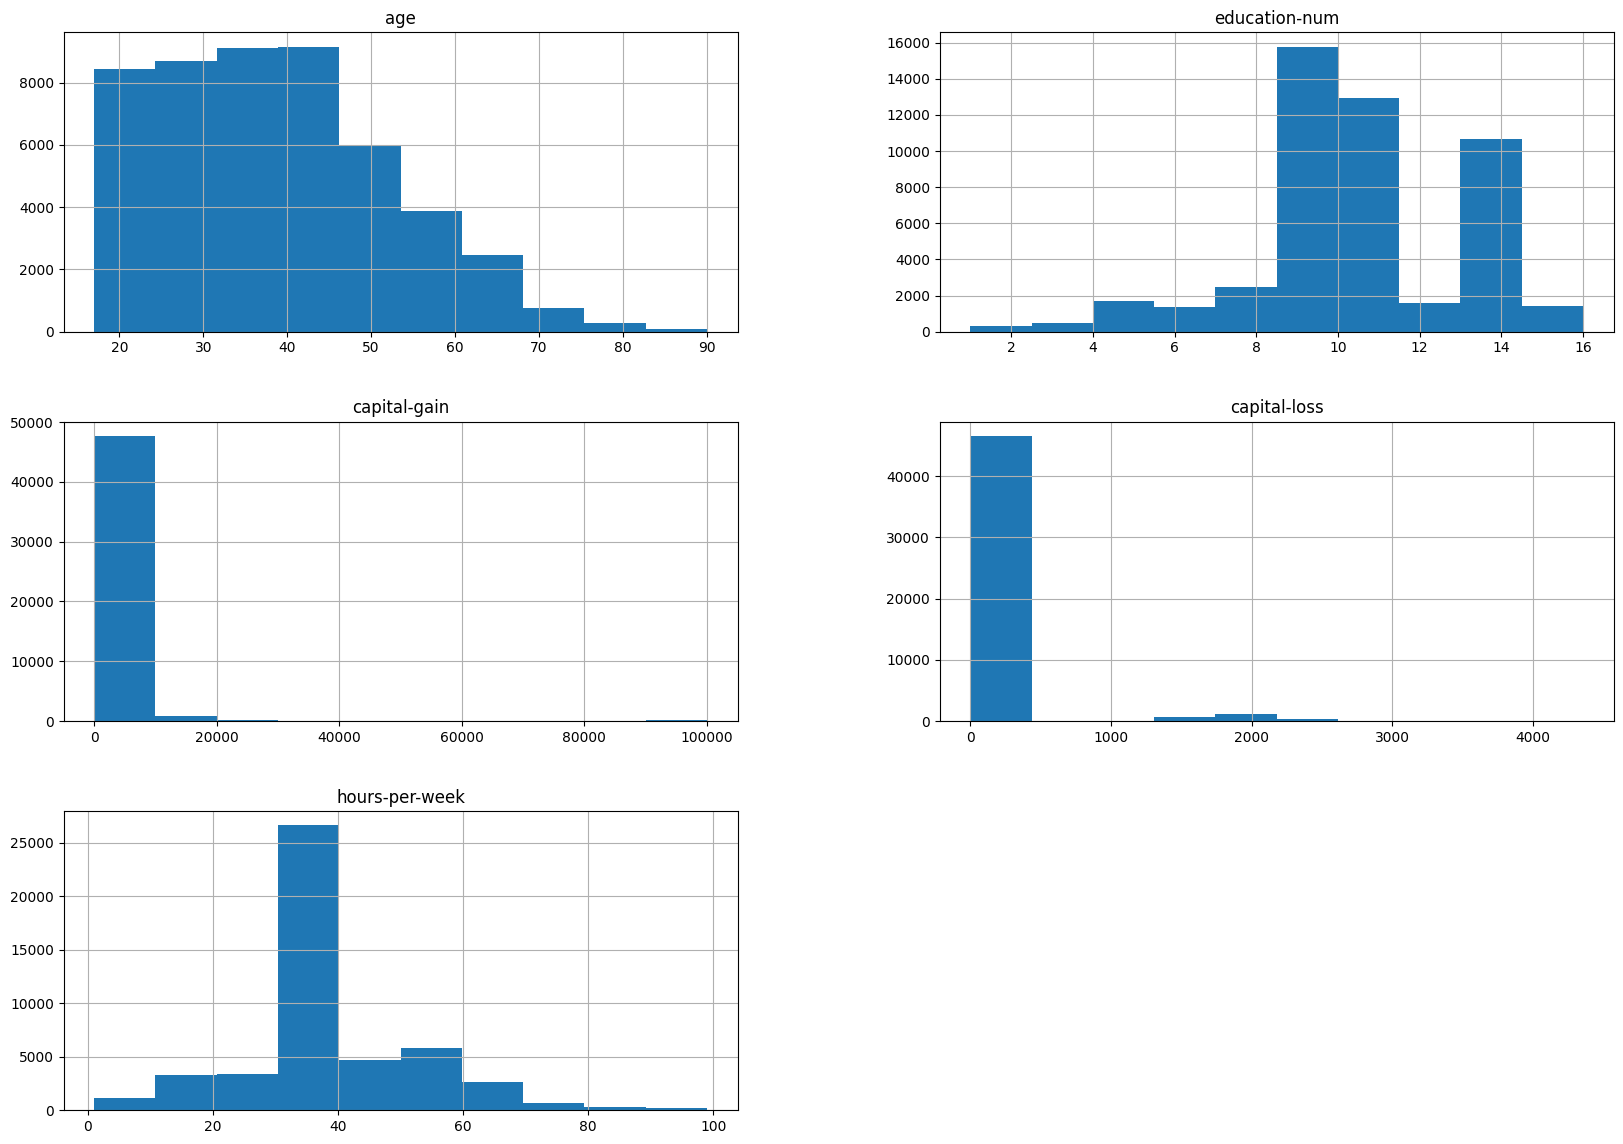

In [7]:
_ = adult_census.hist(figsize=(20, 14))

In [8]:
adult_census["sex"].value_counts()

 Male      32650
 Female    16192
Name: sex, dtype: int64

In [9]:
adult_census["education"].value_counts()

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

In [10]:
# Let’s look at the relationship between "education" and "education-num".
pd.crosstab(index=adult_census["education"], columns=adult_census["education-num"])

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


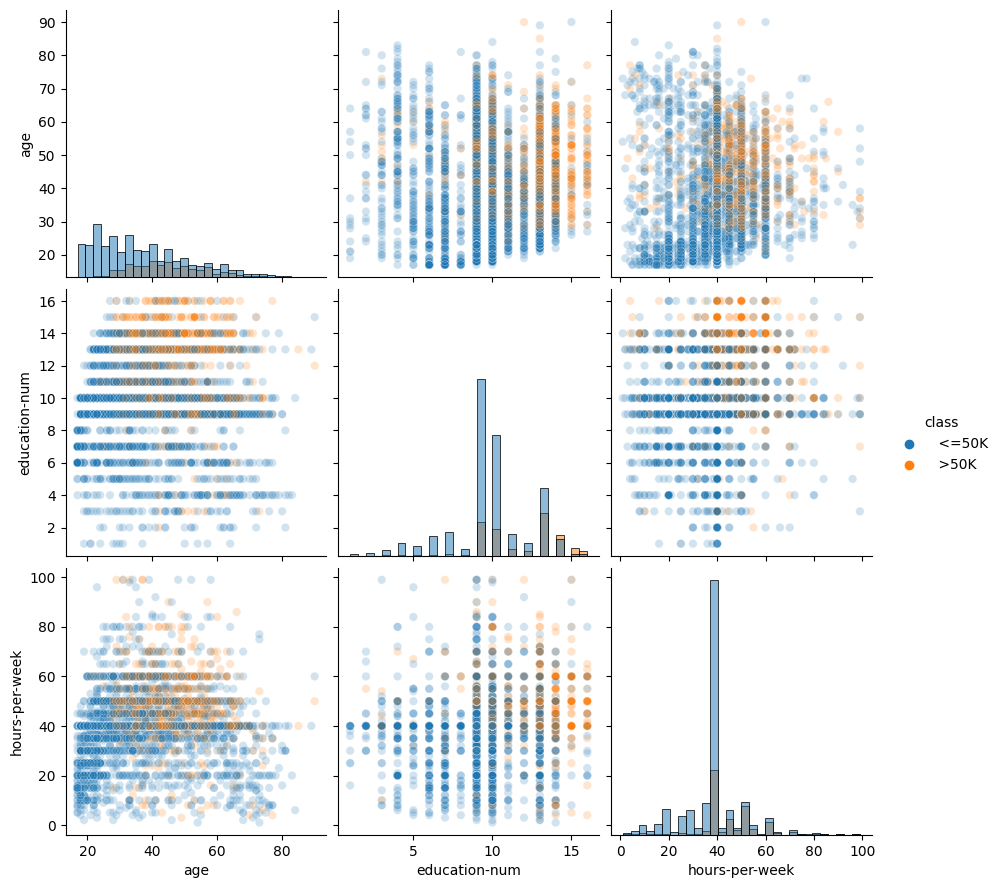

In [11]:
# Another way to inspect the data is to do a pairplot and show how each variable differs according to our target, i.e. "class". Plots along the diagonal show the distribution of individual variables for each "class". The plots on the off-diagonal can reveal interesting interactions between variables.
import seaborn as sns

# We will plot a subset of the data to keep the plot readable and make the
# plotting faster
n_samples_to_plot = 5000
columns = ["age", "education-num", "hours-per-week"]
_ = sns.pairplot(
    data=adult_census[:n_samples_to_plot],
    vars=columns,
    hue=target_column,
    plot_kws={"alpha": 0.2},
    height=3,
    diag_kind="hist",
    diag_kws={"bins": 30},
)

# Creating decision rules by hand
By looking at the previous plots, we could create some hand-written rules that predict whether someone has a high- or low-income. For instance, we could focus on the combination of the "hours-per-week" and "age" features.

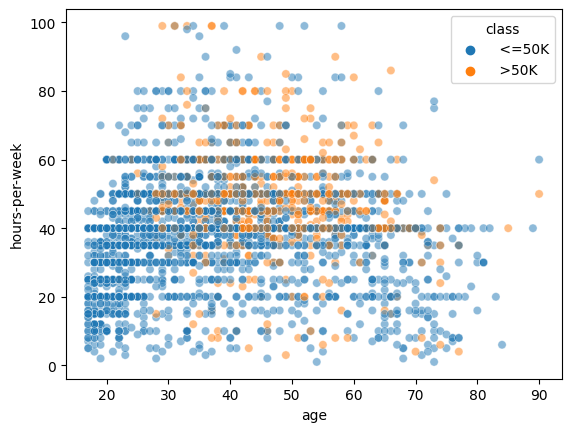

In [12]:
_ = sns.scatterplot(
    x="age",
    y="hours-per-week",
    data=adult_census[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5,
)

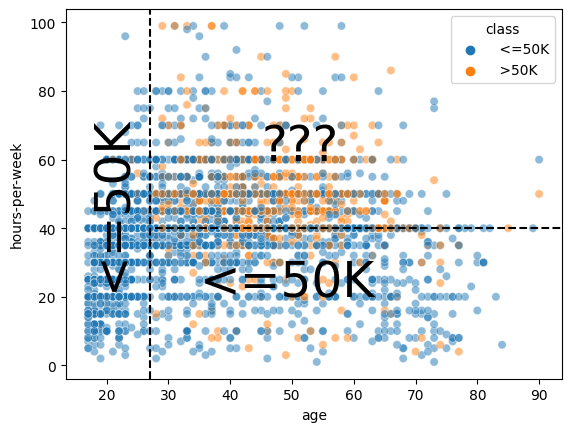

In [13]:
# In this plot, we can try to find regions that mainly contains a single class such that we can easily decide what class one should predict. We could come up with hand-written rules as shown in this plot:
import matplotlib.pyplot as plt

ax = sns.scatterplot(
    x="age",
    y="hours-per-week",
    data=adult_census[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5,
)

age_limit = 27
plt.axvline(x=age_limit, ymin=0, ymax=1, color="black", linestyle="--")

hours_per_week_limit = 40
plt.axhline(y=hours_per_week_limit, xmin=0.18, xmax=1, color="black", linestyle="--")

plt.annotate("<=50K", (17, 25), rotation=90, fontsize=35)
plt.annotate("<=50K", (35, 20), fontsize=35)
_ = plt.annotate("???", (45, 60), fontsize=35)